# 아이유 팬이 좋아할만한 다른 아티스트 찾기

In [5]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [6]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [7]:
data['artist'] = data['artist'].str.lower() # 검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 바꿔줍시다.
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [8]:
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition][:5]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706


- 첫번째 유저가 좋아하는 아티스트들을 열어본 결과입니다.
- 도메인 지식이 부족하다면 추천 시스템을 구축하기란 쉽지 않은 일입니다.

### 데이터 탐색
따라서 추천 모델을 만들기 전, 아래 세 가지의 항목을 확인합니다.

- 유저 수, 아티스트 수, 인기 많은 아티스트
- 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
- 유저 play 횟수 중앙값에 대한 통계

In [9]:
# 유저 수
data['user_id'].nunique()

358868

In [10]:
data['artist'].nunique()

291346

In [11]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [12]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

### 모델 검증을 위한 사용자 초기 정보 세팅

- 본 시스템을 통해 본인의 음악 취향과 가장 유사한 아티스트를 추천받고자 하는 것이므로, 유튜브 시스템과 같이 좋아하는 아티스트를 최소 5개 정도 추가해야 합니다.
- 따라서 **아래와 같이 5명의 아티스트를 추가합니다.**

In [13]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = pd.concat([data, my_playlist])                            # 위에 임의로 만든 my_playlist 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


### 모델에 활용하기 위한 전처리

In [14]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [15]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [16]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


### 사용자의 명시적/암묵적 평가

**명시적 평가**: 좋아요나 별점처럼 선호도를 나타내는 것<br>
**암묵적 평가**: 플레이 횟수, 클릭 횟수, 구매 여부 등 암묵적으로 알 수 있는 평가항목


- 본 코드에서 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용합니다.
    1. 한 번이라도 들었으면 선호한다고 판단한다.
    2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

In [17]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']==1]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147739,17535660
Ratio of only_one over all data is 0.84%


### Matrix Factorization (MF)

- m명의 사용자들이 n명의 아티스트에 대해 평가한 데이터를 포함한 (m, n) 사이즈의 평가 행렬을(Rating Matrix) 만든다.
- 행렬 중 일부는 채워져 있겠지만, 나머지 부분은 데이터가 비어 있다. **(협업 필터링의 평가행렬 전제)**
    - 비어있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면 완벽한 추천을 할 수 있게 된다.
    
- 본 코드에서는 Matrix Factorization(MF, 행렬 분해) 모델을 사용한다.
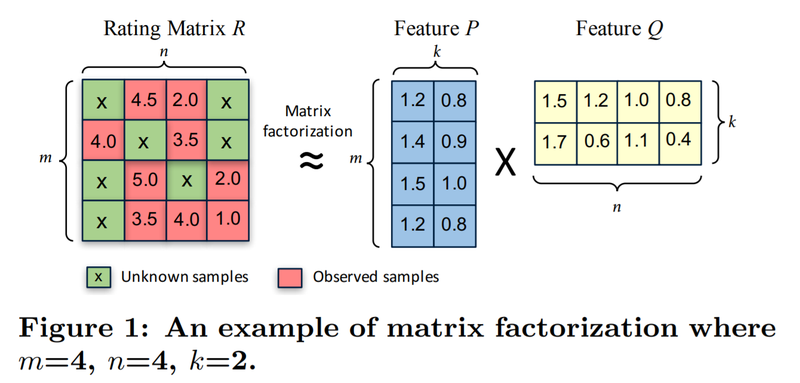

<br><br>
- MF 모델은 큰 평가 행렬 R을 두 개의 Feature Matrix P와 Q로 분해한다.
    - (m, k) 사이즈의 Feature Matrix P는 k 차원의 벡터를 모아놓은 행렬이고 아래의 그림에서 첫 벡터인 P0=(1, 0.1)은 빨간 모자를 쓴 첫 번째 **사용자의 특성(Feature) 벡터**가 된다.
    - 같은 방식으로 Q 행렬의 첫 번째 벡터 Q0=(0.9, -0.2)는 해리포터 **영화의 특성 벡터**가 된다.
- 이 **두 벡터를 내적**해서 얻어지는 0.88이 R0,0으로 정의되는 **사용자의 영화 선호도로 보는 모델이 MF 모델**이다.
<br><br>

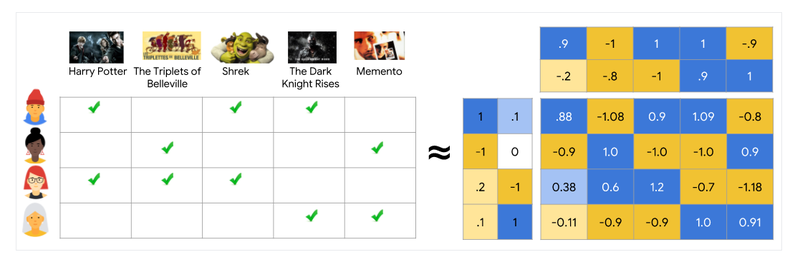


### Compressed Sparse Row (CSR)
- Sparse한 matrix에서 **0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성**하여 메모리 사용량을 최소화하면서 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조

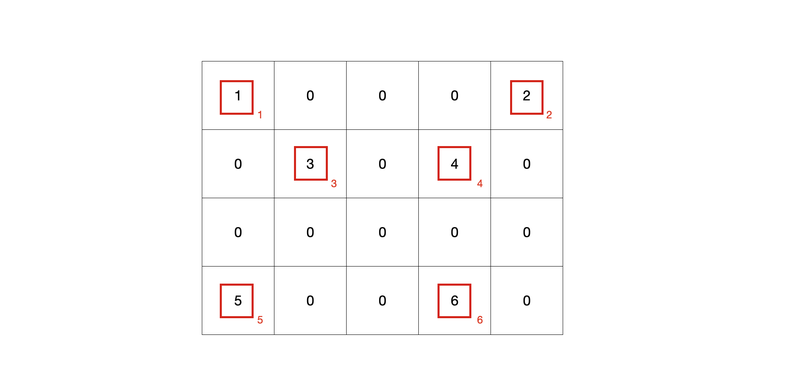

- CSR Matrix는 data, indices, indptr로 행렬을 압축하여 표현한다.

    - data : **0이 아닌 원소를 차례로 기입**한 값
        - data = [1, 2, 3, 4, 5]
    - indices : **data의 각 요소 위치**를 표현한 index
        - indices = [0, 4, 1, 3, 0, 3]
    - indptr : **[최초시작행번호, 시장행에서의 데이터 개수, 두번째 행에서의 데이터 누적개수 ... , 마지막 행에서의 데이터 누적개수]**이며, 이를 통해 data의 요소들이 어느 행에 있는지 알 수 있다.
        - indptr = [0, 2, 4, 4, 6]

In [18]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

## MF 모델 학습하기

- Matrix Factorization 모델을 implicit 패키지를 사용하여 학습한다.

    - **Implicit** 패키지는 앞서 살펴본 암묵적 dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있도록 하는 패키지이다.
    - 이 패키지에 구현되어 있는 **als(AlternatingLeastSquares) 모델**을 사용한다.
        - Matrix Factorization을 통해 나눠진 두 개의 행렬을 한 번에 학습하는 것은 잘 수렴하지 않기 때문에 **한 쪽을 고정시키고 다른 쪽을 학습하는 과정을 번갈아 수행**해서 이 문제를 해결한다.

In [19]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [20]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, # 유저와 아이템의 벡터를 몇 차원으로 설정할지
                                    regularization=0.01, # 과적합 방지를 위해 정규화 값을 얼마나 사용할 것인지
                                    use_gpu=False, # GPU를 사용할 것인지
                                    iterations=15, # Epochs와 같은 의미
                                    dtype=np.float32)

- factors와 iterations를 높일 수록 데이터가 과적합될 확률이 높아진다.
- 따라서 이를 잘 조절해야 한다.

In [21]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [22]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

**아래 두 가지 내용을 한 번 확인한다.**
1. Zimin 벡터와 black eyed peas의 **벡터를 어떻게 만들고 있는지**
2. 두 벡터를 **곱하면 어떤 값**이 나오는지

In [23]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

In [24]:
zimin_vector

array([-1.3159577 , -0.550764  , -0.00820103, -0.75488955, -1.0315633 ,
       -0.92215604, -0.05213808,  0.21254064,  0.0739013 ,  0.41757733,
        0.04868593,  0.2880053 ,  0.93847823,  0.42806172, -0.7354554 ,
        0.50814104, -0.12682225,  0.8103379 , -0.41065785, -0.98085827,
        0.59300685,  0.18188548,  1.155139  ,  0.35241672,  1.7359667 ,
        0.6663636 , -0.55155313,  0.02705493,  0.46420112,  0.6112983 ,
       -0.5329695 , -0.18983796,  1.2546031 ,  0.8669874 , -0.32511714,
       -0.0925846 ,  1.1592394 , -0.7264164 ,  0.26169816, -0.79389125,
       -0.33662927,  0.739159  , -0.34042463, -0.45728558, -0.64331067,
        0.820611  ,  0.19944136, -0.08620614,  0.0781647 ,  0.02129711,
       -0.35710174,  1.0414444 ,  0.21366577, -1.7249364 , -0.7070317 ,
        0.12906514,  0.6905716 , -0.6888403 , -0.6387104 , -0.01467403,
       -0.05359475, -1.1561282 ,  0.36381474, -1.3107212 , -0.6181359 ,
        0.5499131 ,  0.14630705,  0.23013341,  0.24253924,  1.06

In [25]:
black_eyed_peas_vector

array([-0.00144285,  0.0065695 ,  0.0084495 , -0.00837869, -0.00261223,
       -0.00164533,  0.001995  ,  0.01289607,  0.0075883 ,  0.00292561,
        0.00962675,  0.00893906,  0.0213541 ,  0.01395641, -0.00476948,
        0.0109489 ,  0.00130919,  0.00540099,  0.00845898, -0.00521269,
        0.00996753, -0.01076495,  0.01853836, -0.00127281,  0.02439187,
        0.01428279,  0.00477322,  0.00203139,  0.01759138,  0.0138905 ,
       -0.01492862,  0.01873548,  0.02153232,  0.03049988,  0.00238056,
        0.01986423,  0.03695012,  0.00264304,  0.01612509, -0.01248322,
        0.00695053,  0.01200434, -0.00188313,  0.00656105,  0.01078774,
        0.01099792,  0.01780472,  0.00585966, -0.00449964,  0.01323316,
       -0.00101181,  0.01378744, -0.00043762, -0.01602205, -0.0117175 ,
        0.00230793,  0.00916704,  0.00176598,  0.00172384, -0.0011921 ,
        0.00067572, -0.00794457,  0.00948425,  0.01005243,  0.00239808,
        0.01992803,  0.0007324 ,  0.0194183 ,  0.0246099 ,  0.00

In [26]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.48399404

- 1이 나와야 높은 수치인데, 한참 낮은 0.49가 나왔다. 따라서 factors를 늘리거나 iterations를 늘려야 할 것이다.
- 이어서 본 모델이 queen에 대한 선호도를 어떻게 예측할 지 확인한다.

In [27]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.29781505

- queen에 대한 결과도 잘 나왔다고 판단할 수 없다.
- 추천 시스템 자체가 이렇게 판단하기엔 모호한 부분이 있어서 일반적인 머신러닝 분야보다 어렵게 평가되곤 한다.

## 비슷한 아티스트 찾기 + 유저에게 추천하기

### 비슷한 아티스트 찾기
- AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통해서 비슷한 아티스트를 찾는다.

In [28]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0000001),
 (277, 0.9884842),
 (28, 0.98098844),
 (5, 0.97932696),
 (217, 0.9750957),
 (473, 0.97253156),
 (247, 0.9682708),
 (490, 0.9637056),
 (268, 0.95299083),
 (418, 0.9524768),
 (910, 0.95174026),
 (694, 0.94996125),
 (1018, 0.94925475),
 (531, 0.9459755),
 (782, 0.9457037)]

- (아티스트 id, 유사도)를 tuple로 반환하고 있다.
- 우리가 보기 쉽게 아티스트 id를 이름으로 매핑한다.

In [29]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'radiohead',
 'placebo',
 'the beatles',
 'oasis',
 'pink floyd',
 'u2',
 'nirvana',
 'foo fighters',
 'the smashing pumpkins',
 'depeche mode',
 'the white stripes']

In [31]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

In [32]:
get_similar_artist('2pac')

['2pac',
 'notorious b.i.g.',
 'nas',
 'dr. dre',
 'the game',
 'jay-z',
 '50 cent',
 'snoop dogg',
 'ice cube',
 'ludacris']

In [33]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'rihanna',
 'beyoncé',
 'katy perry',
 'the pussycat dolls',
 'christina aguilera',
 'justin timberlake',
 'kelly clarkson',
 'mariah carey']

### 유저에게 아티스트 추천하기
- AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받는다.
- filter_already_liked_items 는 유저가 이미 평가한 아이템은 제외하는 Argument이다.

In [34]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.46037868),
 (550, 0.45401835),
 (2249, 0.44582438),
 (1800, 0.44557512),
 (369, 0.4395451),
 (627, 0.43599725),
 (391, 0.42101777),
 (724, 0.40920034),
 (354, 0.40549433),
 (901, 0.39868334),
 (621, 0.39796862),
 (355, 0.38726386),
 (409, 0.37704706),
 (274, 0.36810458),
 (382, 0.36650413),
 (564, 0.36097315),
 (5555, 0.36039057),
 (358, 0.35719332),
 (944, 0.35382286),
 (618, 0.35241288)]

In [35]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'britney spears',
 'katy perry',
 'lady gaga',
 'justin timberlake',
 'maroon 5',
 'christina aguilera',
 'lily allen',
 'nelly furtado',
 'pink',
 'alicia keys',
 'madonna',
 'amy winehouse',
 'michael jackson',
 'mika',
 'kanye west',
 'timbaland',
 'kelly clarkson',
 'avril lavigne',
 'the pussycat dolls']

In [36]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

- explain 메서드를 사용하면 기록을 남긴 데이터 중 이 추천에 기여한 정도를 확인할 수 있다.
- 이 method는 추천한 콘텐츠의 점수에 기여한 다른 콘텐츠와 기여도(합이 콘텐츠의 점수가 됩니다.)를 반환한다. 
- 어떤 아티스트들이 이 추천에 얼마나 기여하고 있는지 아래의 코드를 통해 확인할 수 있다.

In [37]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.23886539894560116),
 ('black eyed peas', 0.14314473722438245),
 ('jason mraz', 0.0466070317137273),
 ('coldplay', 0.032713625967999566),
 ('maroon5', 0.0002634237773535335)]

### 본 코드의 아쉬운 점
- 유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않다. 연령대별로 음악 취향이 고려되지 않았다.
- 유저가 언제 play 했는지에 반영하기 어렵다.